In [55]:
import random 
import numpy as np 
import pandas as pd
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
%matplotlib inline

#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

np.random.seed(123)

In [56]:
df = pd.read_csv('Live.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [57]:
df.shape

(7050, 16)

# Data Preprocessing

## Univariate Analysis

Text(0.5, 1.0, '')

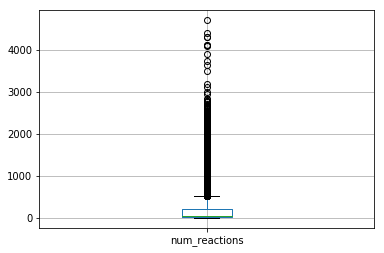

In [58]:
df.boxplot(column = 'num_reactions');
plt.title('')

Text(0.5, 1.0, '')

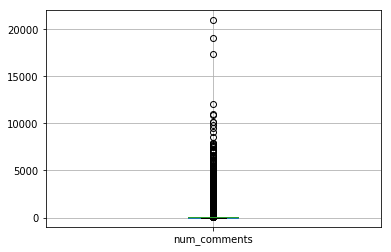

In [59]:
df.boxplot(column = 'num_comments');
plt.title('')

Text(0.5, 1.0, '')

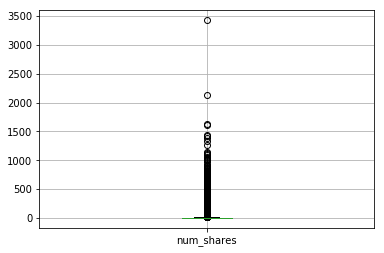

In [60]:
df.boxplot(column = 'num_shares');
plt.title('')

Text(0.5, 1.0, '')

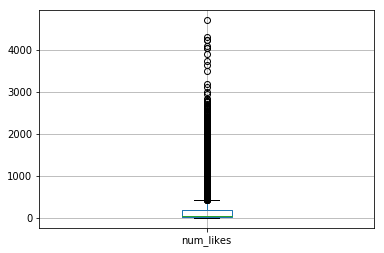

In [61]:
df.boxplot(column = 'num_likes');
plt.title('')

Text(0.5, 1.0, '')

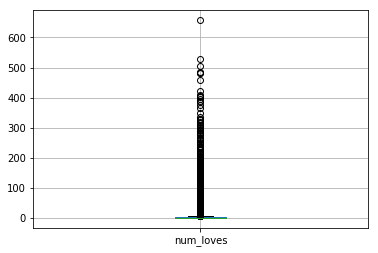

In [62]:
df.boxplot(column = 'num_loves');
plt.title('')

Text(0.5, 1.0, '')

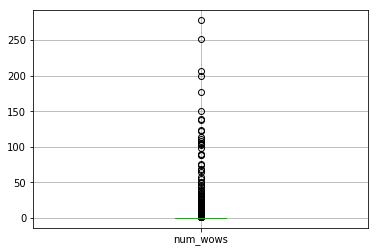

In [63]:
df.boxplot(column = 'num_wows');
plt.title('')

Text(0.5, 1.0, '')

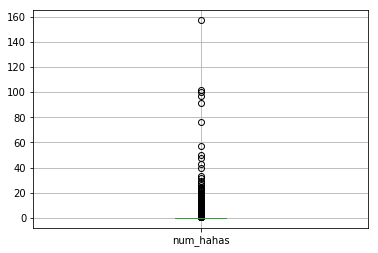

In [64]:
df.boxplot(column = 'num_hahas');
plt.title('')

Text(0.5, 1.0, '')

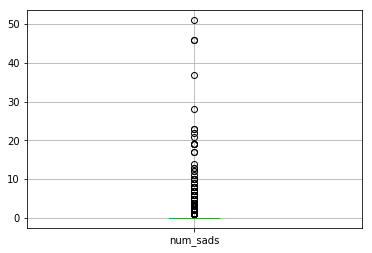

In [65]:
df.boxplot(column = 'num_sads');
plt.title('')

Text(0.5, 1.0, '')

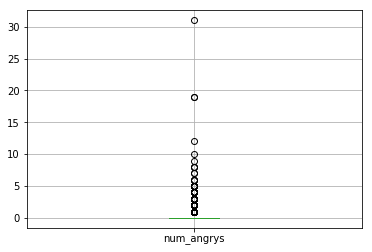

In [66]:
df.boxplot(column = 'num_angrys');
plt.title('')

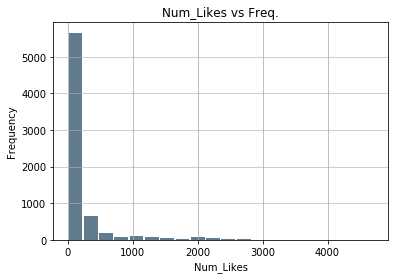

In [67]:
df.num_likes.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Num_Likes vs Freq.')
plt.xlabel('Num_Likes')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

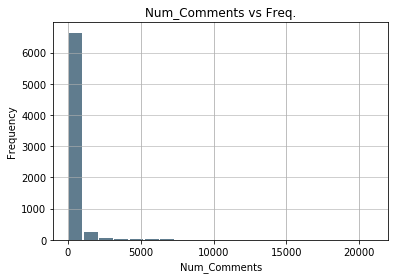

In [68]:
df.num_comments.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Num_Comments vs Freq.')
plt.xlabel('Num_Comments')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

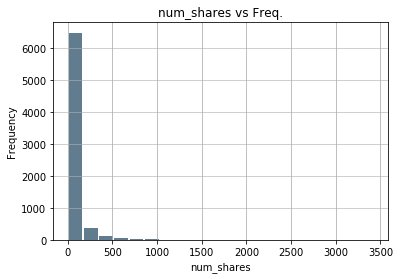

In [69]:
df.num_shares.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('num_shares vs Freq.')
plt.xlabel('num_shares')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

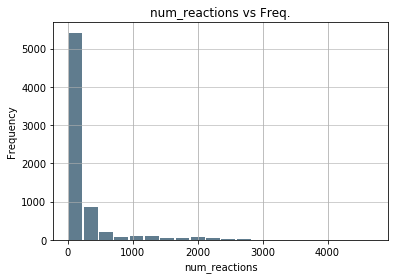

In [70]:
df.num_reactions.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('num_reactions vs Freq.')
plt.xlabel('num_reactions')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

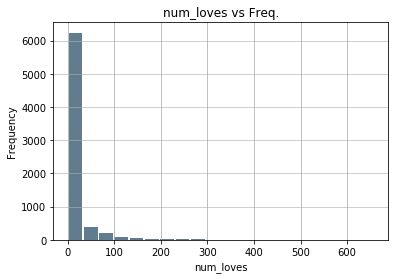

In [71]:
df.num_loves.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('num_loves vs Freq.')
plt.xlabel('num_loves')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

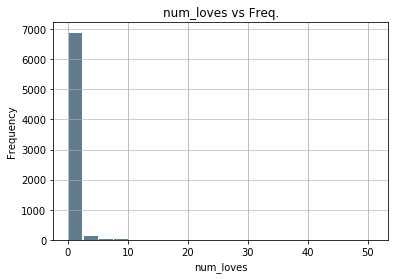

In [72]:
df.num_sads.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('num_loves vs Freq.')
plt.xlabel('num_loves')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

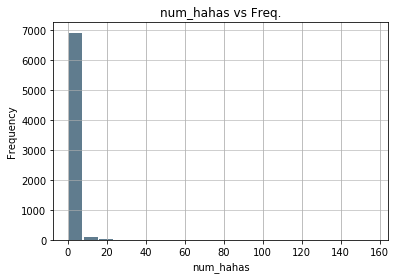

In [73]:
df.num_hahas.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('num_hahas vs Freq.')
plt.xlabel('num_hahas')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

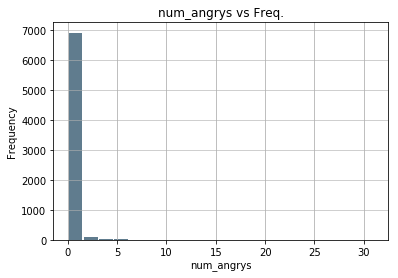

In [74]:
df.num_angrys.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('num_angrys vs Freq.')
plt.xlabel('num_angrys')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

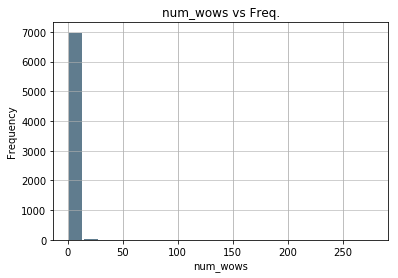

In [75]:
df.num_wows.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('num_wows vs Freq.')
plt.xlabel('num_wows')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

## Bivariate Analysis

In [76]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning:

invalid value encountered in less



,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
num_reactions,1,0.150843,0.250723,0.994923,0.305003,0.267752,0.176028,0.075138,0.124326,nan,nan,nan,nan
num_comments,0.150843,1,0.640637,0.101687,0.521223,0.162394,0.325048,0.236453,0.225184,nan,nan,nan,nan
num_shares,0.250723,0.640637,1,0.172492,0.82,0.407628,0.399826,0.19997,0.312513,nan,nan,nan,nan
num_likes,0.994923,0.101687,0.172492,1,0.209308,0.2078,0.120784,0.0521688,0.0874307,nan,nan,nan,nan
num_loves,0.305003,0.521223,0.82,0.209308,1,0.508798,0.50783,0.2076,0.371001,nan,nan,nan,nan
num_wows,0.267752,0.162394,0.407628,0.2078,0.508798,1,0.287756,0.0865027,0.183087,nan,nan,nan,nan
num_hahas,0.176028,0.325048,0.399826,0.120784,0.50783,0.287756,1,0.141421,0.21191,nan,nan,nan,nan
num_sads,0.075138,0.236453,0.19997,0.0521688,0.2076,0.0865027,0.141421,1,0.142072,nan,nan,nan,nan
num_angrys,0.124326,0.225184,0.312513,0.0874307,0.371001,0.183087,0.21191,0.142072,1,nan,nan,nan,nan
Column1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


## Missing Values Imputation

In [77]:
df = df.dropna(axis=1, how='all')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [78]:
#check for missing values
Temp = pd.DataFrame(df.isnull().sum())
Temp.columns = ['Sum']
print('Amount of rows with missing values: ' + str(len(Temp.index[Temp['Sum'] > 0])) )

Amount of rows with missing values: 0


In [79]:
# Drop Unnecessary columns
df = df.drop(axis=1, columns='status_published')
df = df.drop(axis=1, columns='status_id')
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [80]:
df.shape

(7050, 10)

## Outliers Treatment

In [81]:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.05,0.95]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

In [82]:
df = cap_data(df)
df.shape

capping the  status_type
capping the  num_reactions
capping the  num_comments
capping the  num_shares


C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\a

capping the  num_likes
capping the  num_loves


C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\a

capping the  num_wows
capping the  num_hahas
capping the  num_sads
capping the  num_angrys


C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



(7050, 10)

Text(0.5, 1.0, '')

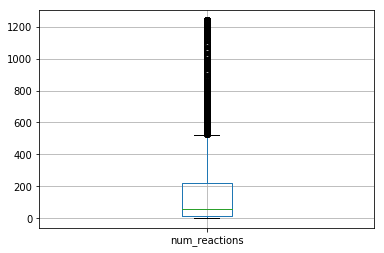

In [83]:
# Verifying after treatment of outliers
df.boxplot(column = 'num_reactions');
plt.title('')

Text(0.5, 1.0, '')

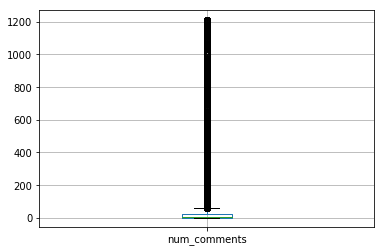

In [84]:
df.boxplot(column = 'num_comments');
plt.title('')

# Feature Engineering

## Variable Transformation

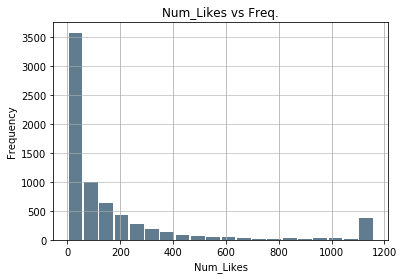

In [85]:
df.num_likes.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Num_Likes vs Freq.')
plt.xlabel('Num_Likes')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

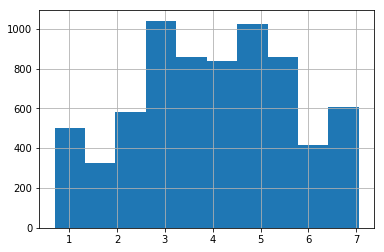

In [86]:
df["num_likes"].apply(np.log).hist()
plt.show()

In [87]:
# Treat the 0s before applying log to avoid -Inf
df["num_likes"] = df["num_likes"] + 1
df["num_comments"] = df["num_comments"] + 1
df["num_shares"] = df["num_shares"] + 1
df["num_hahas"] = df["num_hahas"] + 1
df["num_loves"] = df["num_loves"] + 1
df["num_reactions"] = df["num_reactions"] + 1
df["num_angrys"] = df["num_angrys"] + 1
df["num_sads"] = df["num_sads"] + 1
df["num_wows"] = df["num_wows"] + 1

In [88]:
df["num_likes"] = df["num_likes"].apply(np.log)
df["num_comments"] = df["num_comments"].apply(np.log)
df["num_shares"] = df["num_shares"].apply(np.log)
df["num_hahas"] = df["num_hahas"].apply(np.log)
df["num_loves"] = df["num_loves"].apply(np.log)
df["num_reactions"] = df["num_reactions"].apply(np.log)
df["num_angrys"] = df["num_angrys"].apply(np.log)
df["num_sads"] = df["num_sads"].apply(np.log)
df["num_wows"] = df["num_wows"].apply(np.log)
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,6.272877,6.240276,5.564903,6.070738,4.356709,1.386294,0.693147,0.693147,0.0
1,photo,5.017280,0.000000,0.000000,5.017280,0.000000,0.000000,0.000000,0.000000,0.0
2,video,5.429346,5.468060,4.060443,5.323010,3.091042,0.693147,0.693147,0.000000,0.0
3,photo,4.718499,0.000000,0.000000,4.718499,0.000000,0.000000,0.000000,0.000000,0.0
4,photo,5.365976,0.000000,0.000000,5.323010,2.302585,0.000000,0.000000,0.000000,0.0


In [89]:
# dropping num_reactions
df = df.drop(columns='num_reactions')

In [90]:
df.head()

,status_type,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,6.240276,5.564903,6.070738,4.356709,1.386294,0.693147,0.693147,0.0
1,photo,0.000000,0.000000,5.017280,0.000000,0.000000,0.000000,0.000000,0.0
2,video,5.468060,4.060443,5.323010,3.091042,0.693147,0.693147,0.000000,0.0
3,photo,0.000000,0.000000,4.718499,0.000000,0.000000,0.000000,0.000000,0.0
4,photo,0.000000,0.000000,5.323010,2.302585,0.000000,0.000000,0.000000,0.0


## Creating Dummy Variables

### Label Encoding

In [91]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_df = LabelEncoder()
df.iloc[:, 0] = labelencoder_df.fit_transform(df.iloc[:, 0])
print(df.head())

   status_type  num_comments  num_shares  num_likes  num_loves  num_wows  \
0            3      6.240276    5.564903   6.070738   4.356709  1.386294   
1            1      0.000000    0.000000   5.017280   0.000000  0.000000   
2            3      5.468060    4.060443   5.323010   3.091042  0.693147   
3            1      0.000000    0.000000   4.718499   0.000000  0.000000   
4            1      0.000000    0.000000   5.323010   2.302585  0.000000   

   num_hahas  num_sads  num_angrys  
0   0.693147  0.693147         0.0  
1   0.000000  0.000000         0.0  
2   0.693147  0.000000         0.0  
3   0.000000  0.000000         0.0  
4   0.000000  0.000000         0.0  


### One Hot Encoding

In [92]:
onehotencoder = OneHotEncoder(categorical_features = [0])
df = pd.DataFrame(onehotencoder.fit_transform(df).toarray())
df.head()

C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning:

The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.

C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning:

The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.



,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,1.0,6.240276,5.564903,6.070738,4.356709,1.386294,0.693147,0.693147,0.0
1,0.0,1.0,0.0,0.0,0.000000,0.000000,5.017280,0.000000,0.000000,0.000000,0.000000,0.0
2,0.0,0.0,0.0,1.0,5.468060,4.060443,5.323010,3.091042,0.693147,0.693147,0.000000,0.0
3,0.0,1.0,0.0,0.0,0.000000,0.000000,4.718499,0.000000,0.000000,0.000000,0.000000,0.0
4,0.0,1.0,0.0,0.0,0.000000,0.000000,5.323010,2.302585,0.000000,0.000000,0.000000,0.0


In [93]:
df.to_csv('Live_Preprocessed_No_Scaling.csv', index=False)

In [39]:
np.where(np.isinf(df))

(array([], dtype=int64), array([], dtype=int64))

In [40]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,1.0,6.240276,5.564903,6.070738,4.356709,1.386294,0.693147,0.693147,0.0
1,0.0,1.0,0.0,0.0,0.000000,0.000000,5.017280,0.000000,0.000000,0.000000,0.000000,0.0
2,0.0,0.0,0.0,1.0,5.468060,4.060443,5.323010,3.091042,0.693147,0.693147,0.000000,0.0
3,0.0,1.0,0.0,0.0,0.000000,0.000000,4.718499,0.000000,0.000000,0.000000,0.000000,0.0
4,0.0,1.0,0.0,0.0,0.000000,0.000000,5.323010,2.302585,0.000000,0.000000,0.000000,0.0


## Feature Scaling

In [41]:
#normalize the dataset
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df))
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.094957,-1.245993,-0.233666,1.421466,1.803657,2.412971,1.260807,2.409736,2.157876,1.123701,3.257990,-0.252646
1,-0.094957,0.802573,-0.233666,-0.703499,-0.972478,-0.651395,0.598128,-0.649914,-0.532052,-0.411476,-0.306938,-0.252646
2,-0.094957,-1.245993,-0.233666,1.421466,1.460119,1.584526,0.790448,1.520878,0.812912,1.123701,-0.306938,-0.252646
3,-0.094957,0.802573,-0.233666,-0.703499,-0.972478,-0.651395,0.410180,-0.649914,-0.532052,-0.411476,-0.306938,-0.252646
4,-0.094957,0.802573,-0.233666,-0.703499,-0.972478,-0.651395,0.790448,0.967156,-0.532052,-0.411476,-0.306938,-0.252646


In [43]:
df.to_csv('Live_Preprocessed.csv', index=False)

# Clustering using K-Medoids

In [117]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.utils import read_sample
# Set random initial medoids.
initial_medoids = [1, 500]
# Create instance of K-Medoids algorithm.
kmedoids_instance = kmedoids(df.values, initial_medoids)
# Run cluster analysis and obtain results.
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
# Show allocated clusters.
print(clusters)
# Display clusters.
visualizer = cluster_visualizer_multidim()
visualizer.append_clusters(clusters, df.values)
visualizer.show(max_row_size=3)

[[5844, 1, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 19, 20, 21, 22, 23, 24, 25, 28, 30, 31, 32, 33, 34, 35, 37, 38, 44, 46, 50, 52, 60, 62, 64, 65, 70, 75, 77, 79, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 114, 115, 122, 123, 126, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 142, 146, 147, 150, 153, 155, 156, 157, 158, 160, 161, 162, 163, 165, 168, 169, 170, 171, 172, 173, 174, 175, 176, 178, 179, 180, 182, 183, 184, 185, 186, 188, 189, 191, 192, 193, 195, 196, 199, 200, 201, 202, 204, 205, 206, 207, 209, 210, 211, 212, 213, 215, 216, 218, 219, 220, 221, 222, 223, 224, 226, 227, 229, 230, 231, 232, 233, 235, 236, 237, 239, 240, 241, 242, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 282, 284, 285, 286, 287, 288, 289, 290, 291, 294, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306,

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()